
# **Competition/facilitation Lotka-Volterra model with AlleeEffect - Submodels**



In [65]:
import numpy as np
import scipy as sc
import scipy.integrate as intg
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform
from scipy.integrate import odeint
sns.set_style('darkgrid')

rng = np.random.default_rng(seed=3141592)

# Logistic Growth

In [ ]:
def logistic(t, X, K, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * (1-X/K)-m*X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)

logistic(t=0, X=np.ones(aux_N), K=aux_K, b=aux_b, m=aux_m)

array([0.12152643, 0.11604474, 0.03572991, 0.03363846, 0.11985778])

In [ ]:
sol = intg.solve_ivp(fun=logistic, t_span=(0., 1e2), y0=np.ones(aux_N), args=(aux_K, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

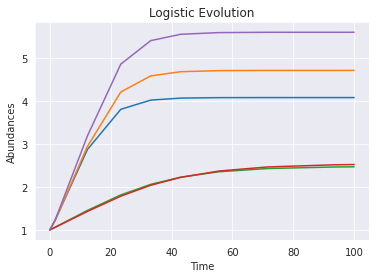

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Logistic Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#   Logistic Growth with Allee Effect

In [ ]:
def logalee(t, X, K, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * (1-X/K)*(X/(X+C))-m*X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_C = rng.uniform(2, 3, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)

logalee(t=0, X=np.ones(aux_N), K=aux_K, C=aux_C, b=aux_b, m=aux_m)

array([ 0.00142558, -0.01112172, -0.00830285, -0.01811691, -0.06589169])

In [ ]:
sol = intg.solve_ivp(fun=logalee, t_span=(0., 1e2), y0=np.ones(aux_N), args=(aux_K, aux_C, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

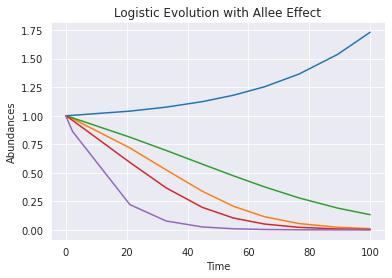

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Logistic Evolution with Allee Effect")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Strong competition Lotka-Volterra Model

In [ ]:
def strongLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(1.5, 1.5, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

strongLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([-0.14197033, -0.09499121, -0.07168145, -0.09822602, -0.09694248])

In [ ]:
sol = intg.solve_ivp(fun=strongLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

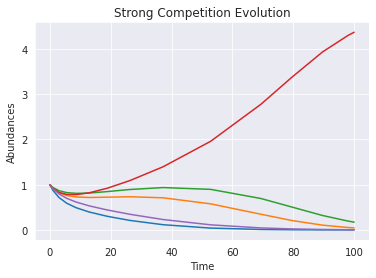

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Strong Competition Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

# Weak competition Lotka-Volterra Model

In [ ]:
def weakLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(0.1, 0.1, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

weakLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([0.13753913, 0.13670525, 0.13902213, 0.07236664, 0.15212297])

In [ ]:
sol = intg.solve_ivp(fun=weakLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

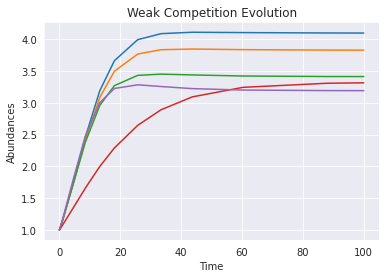

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Weak Competition Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Facilitation Lotka-Volterra Model

In [ ]:
def facilLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K + (A @ X))/K ) - m * X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(0.1, 0.1, size=(aux_N, aux_N))
aux_A += np.diag(-np.ones(aux_N)) -np.diag(aux_A.diagonal())
print(aux_A)
facilLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

[[-1.   0.1  0.1  0.1  0.1]
 [ 0.1 -1.   0.1  0.1  0.1]
 [ 0.1  0.1 -1.   0.1  0.1]
 [ 0.1  0.1  0.1 -1.   0.1]
 [ 0.1  0.1  0.1  0.1 -1. ]]


array([0.12000436, 0.14621131, 0.11102962, 0.07876012, 0.10087195])

In [ ]:
sol = intg.solve_ivp(fun=facilLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

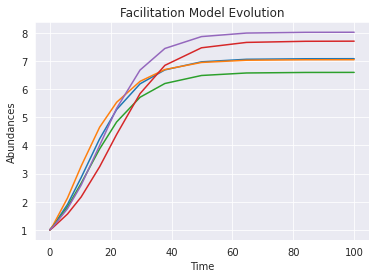

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Facilitation Model Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#   Competition/facilitation Lotka-Volterra Model

In [ ]:
def compfacilLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [ ]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(-0.1, 0.5, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())

compfacilLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([0.06568968, 0.18636166, 0.11123728, 0.11186045, 0.14216331])

In [ ]:
sol = intg.solve_ivp(fun=compfacilLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

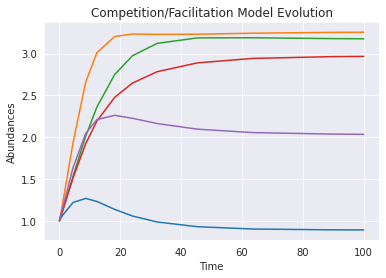

In [ ]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Competition/Facilitation Model Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Competition/facilitation Lotka-Volterra model with Allee Effect

In [147]:
def pred_equilibria(A, K, b, C, m, n):
    aa = b*((n-1)*A + 1)
    a2=b
    bb = -(b-m)*K
    b2=K*(m-b)
    cc = m*C*K
    c2=m*C*K*(A*(2-n+2)-1)/(A-1)
    delta = bb*bb - 4*aa*cc
    delta2 = b2*b2 - 4*a2*c2
    E1=( -bb + np.sqrt(delta) )/(2*aa)
    E2=( -bb - np.sqrt(delta) )/(2*aa)
    E3=( -b2 + np.sqrt(delta2) )/(2*a2)
    E4=( -b2 - np.sqrt(delta2) )/(2*a2)
    E5=-K*m*C/(b*(A-1)*E3)
    E6=-K*m*C/(b*(A-1)*E4)
    if delta > 0:
        return E1,E2,E3,E4,E5,E6

In [148]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [153]:
aux_N = 100
fraction = 0.001
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_C = aux_K*fraction #between 2 and 3
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
aux_A = np.zeros((aux_N, aux_N))+1
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
#equilibriums = pred_equilibria(aux_A[0,1], aux_K[0], aux_b[0], aux_C[0], aux_m[0], aux_N)

In [156]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

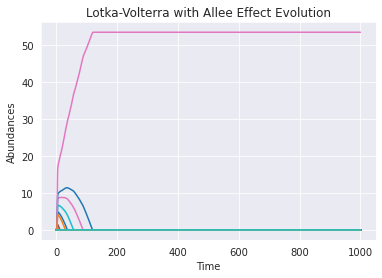

In [157]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
plt.show()

In [160]:
sol.y[:,-1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

#  Competition/facilitation Lotka-Volterra model with Allee Effect - Species Richness

## Normal version 

In [161]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [162]:
aux_N = 100
fraction = 0.001 #*100 = K
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_C = aux_K*fraction #between 2 and 3
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
aux_A = np.zeros((aux_N, aux_N))+0
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
#completeLV_gaussian(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, C=aux_C, b=aux_b, m=aux_m,sigma=sigma)

In [163]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e2), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

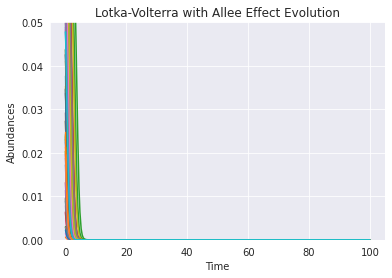

In [164]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")
plt.ylim((0,0.05))
plt.show()

In [165]:
a = sol.y[:,-1]
print(a)

[ 0.          0.          0.          0.          0.          0.
  0.          0.         53.35781557  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         53.35781472 53.35781472
  0.          0.         53.35781472  0.          0.          0.
  0.          0.         53.35781472 53.35781472 53.35781472  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         53.35781472  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         53.35781472  0.          0.
  0.          0. 

## Species richness changing Allee effect constant C

In [ ]:
C_values = np.linspace(0.1,0.113,50)
supper_mean1 = []
supper_std1 = []
slower_mean1 = []
slower_std1 = []
n_trials = 20
for i in C_values:
  tmp_upper = []
  tmp_lower = []
  for j in range(n_trials):
    aux_C = np.ones(aux_N)*(i)
    sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))
    final_state = sol['y']
    final_state = final_state[:,-1]
    final_state_upper = final_state[final_state>=0.5]
    final_state_lower = final_state[1e-3<=final_state]
    final_state_lower = final_state_lower[final_state_lower<0.5]
    species_upper = final_state_upper.shape[0]
    species_lower = final_state_lower.shape[0]
    tmp_upper.append(species_upper)
    tmp_lower.append(species_lower)
  supper_mean1.append(np.mean(tmp_upper))
  supper_std1.append(np.std(tmp_upper))
  slower_mean1.append(np.mean(tmp_lower))
  slower_std1.append(np.std(tmp_lower))

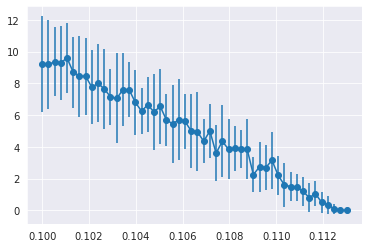

In [ ]:
plt.errorbar(C_values,supper_mean1, yerr=supper_std1,fmt='-o')
plt.show()

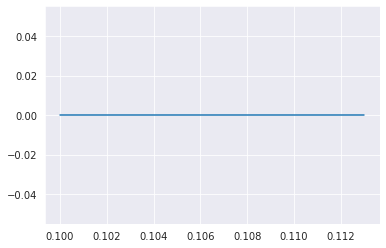

In [ ]:
plt.errorbar(C_values,slower_mean1, yerr=slower_std1)
plt.show()

### Species richness as function of C and A

In [ ]:
aux_N = 100
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
C_values = np.linspace(0.1,0.113,20)
alpha_values = np.linspace(0,1.5,20)
supper_mean = []
supper_std = []
slower_mean = []
slower_std = []
n_trials = 10
for k in alpha_values:
  for i in C_values:
    tmp_upper = []
    tmp_lower = []
    for j in range(n_trials):
      aux_A = np.zeros((aux_N, aux_N))+k
      aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
      aux_C = np.ones(aux_N)*(i)
      sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))
      final_state = sol['y']
      final_state = final_state[:,-1]
      final_state_upper = final_state[final_state>=0.1]
      final_state_lower = final_state[1e-3<=final_state]
      final_state_lower = final_state_lower[final_state_lower<0.1]
      species_upper = final_state_upper.shape[0]
      species_lower = final_state_lower.shape[0]
      tmp_upper.append(species_upper)
      tmp_lower.append(species_lower)
    supper_mean.append(np.mean(tmp_upper))
    supper_std.append(np.std(tmp_upper))
    slower_mean.append(np.mean(tmp_lower))
    slower_std.append(np.std(tmp_lower))

In [ ]:
num = 20
m_supper_mean = np.zeros((num,num))
m_slower_mean = np.zeros((num,num))
m_supper_std = np.zeros((num,num))
m_slower_std = np.zeros((num,num))
#row is A, column is C value

In [ ]:
for l in range(num):
  m_supper_mean[l] = supper_mean[l*num:(l+1)*num] 
  m_slower_mean[l] = supper_std[l*num:(l+1)*num] 
  m_supper_std[l] = slower_mean[l*num:(l+1)*num] 
  m_slower_std[l] = slower_std[l*num:(l+1)*num] 

In [ ]:
#@title 
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

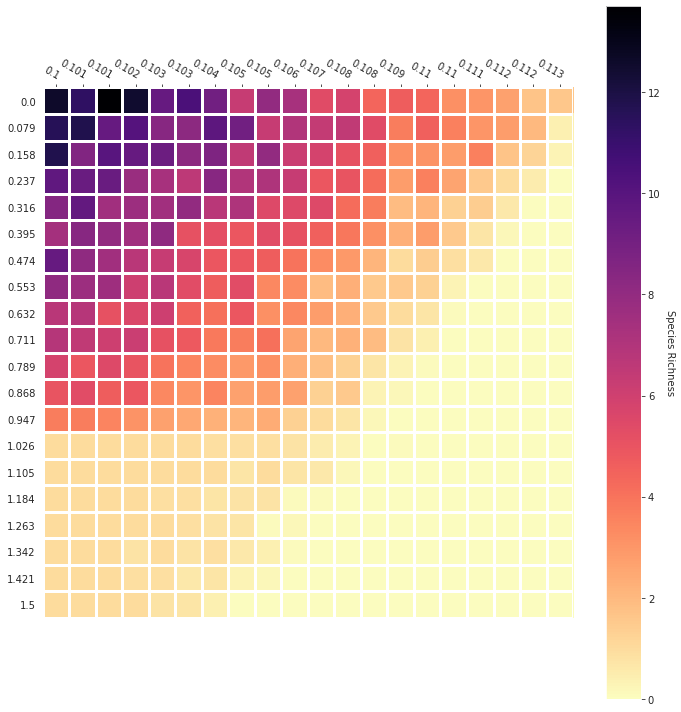

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(m_supper_mean, np.around(alpha_values,3), np.around(C_values,3), ax=ax,
                   cmap="magma_r", cbarlabel="Species Richness")

plt.grid()
fig.tight_layout()
plt.show()

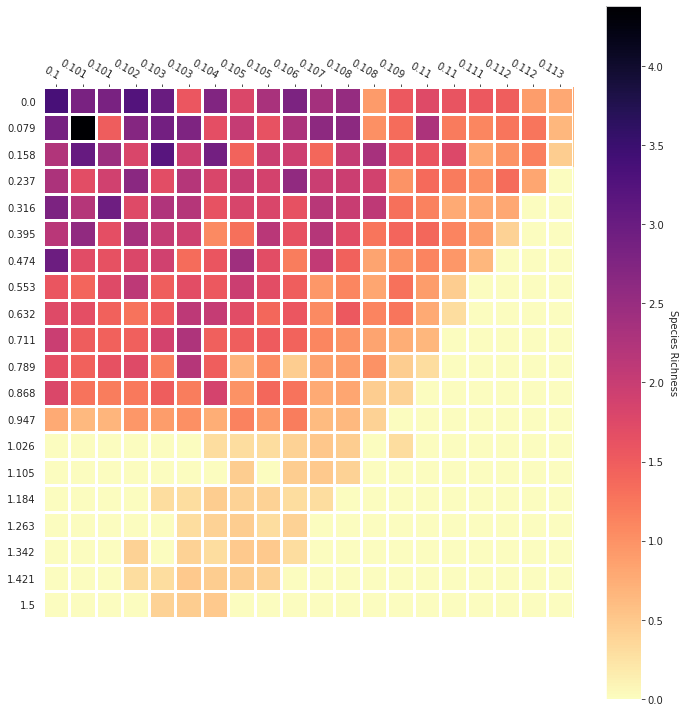

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(m_slower_mean, np.around(alpha_values,3), np.around(C_values,3), ax=ax,
                   cmap="magma_r", cbarlabel="Species Richness")

plt.grid()
fig.tight_layout()
plt.show()

#  Competition/facilitation Lotka-Volterra model with Allee Effect - Stochastic
## sigma = 2e-2

In [67]:
def completeLV_2(X,t, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [166]:
aux_N = 100
fraction = 0.001
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_C = aux_K*fraction #between 2 and 3
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
aux_A = np.zeros((aux_N, aux_N))+0.1
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())

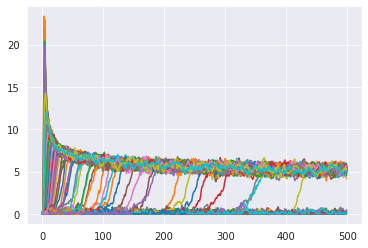

(500, 100)


In [167]:
from scipy.integrate import odeint
time = np.linspace(0,5e2,int(5e2))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [ ]:
aux_N = 100
fraction = 0.001
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
C_values = np.linspace(0.1,0.113,20)
alpha_values = np.linspace(0,1.5,20)
supper_mean = []
supper_std = []
slower_mean = []
slower_std = []
n_trials = 10
for k in alpha_values:
  for i in C_values:
    print(k,i)
    tmp_upper = []
    tmp_lower = []
    for j in range(n_trials):
      aux_A = np.zeros((aux_N, aux_N))+k
      aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
      aux_C = np.ones(aux_N)*(i)
      ##solving the equation itself
      time = np.linspace(0,1e3,int(1e3))
      total_sol = np.zeros((time.shape[0],aux_N))
      sigma = 2e-1
      y0 = rng.uniform(0,0.1,size=aux_N)
      total_sol[0] = y0
      for i in range(time.shape[0]-1):
        tmp_time = time[i:i+2]
        tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
        tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
        total_sol[i+1] = tmp_sol[-1]
        total_sol[total_sol<1e-3] = 1e-3
        y0 = tmp_sol[-1]
      #analysis
      final_state = total_sol[-1,:]
      final_state_upper = final_state[final_state>=0.1]
      final_state_lower = final_state[1e-3<=final_state]
      final_state_lower = final_state_lower[final_state_lower<0.1]
      species_upper = final_state_upper.shape[0]
      species_lower = final_state_lower.shape[0]
      tmp_upper.append(species_upper)
      tmp_lower.append(species_lower)
    supper_mean.append(np.mean(tmp_upper))
    supper_std.append(np.std(tmp_upper))
    slower_mean.append(np.mean(tmp_lower))
    slower_std.append(np.std(tmp_lower))

0.0 0.1
0.0 0.10068421052631579
0.0 0.10136842105263158
0.0 0.10205263157894737
0.0 0.10273684210526317
0.0 0.10342105263157896
0.0 0.10410526315789474
0.0 0.10478947368421053
0.0 0.10547368421052632


In [ ]:
num = 20
m_supper_mean = np.zeros((num,num))
m_slower_mean = np.zeros((num,num))
m_supper_std = np.zeros((num,num))
m_slower_std = np.zeros((num,num))
#row is A, column is C value

In [ ]:
for l in range(num):
  m_supper_mean[l] = supper_mean[l*num:(l+1)*num] 
  m_slower_mean[l] = supper_std[l*num:(l+1)*num] 
  m_supper_std[l] = slower_mean[l*num:(l+1)*num] 
  m_slower_std[l] = slower_std[l*num:(l+1)*num] 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(m_supper_mean, np.around(alpha_values,3), np.around(C_values,3), ax=ax,
                   cmap="magma_r", cbarlabel="Species Richness")

plt.grid()
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(m_slower_mean, np.around(alpha_values,3), np.around(C_values,3), ax=ax,
                   cmap="magma_r", cbarlabel="Species Richness")

plt.grid()
fig.tight_layout()
plt.show()

# Competition/facilitation Lotka-Volterra model with Allee Effect - Stochastic + Variable K

In [ ]:
from scipy.integrate import odeint
aux_N = 100
fraction = 0.001
aux_K = np.ones(aux_N)*100 #between 5 and 6
aux_C = aux_K*fraction
aux_b = np.ones(aux_N)*5.37 #between 0.1 and 0.3
aux_m = np.ones(aux_N)*2.5 #between 0 and 0.1
aux_A = np.zeros((aux_N, aux_N))+0.3
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())

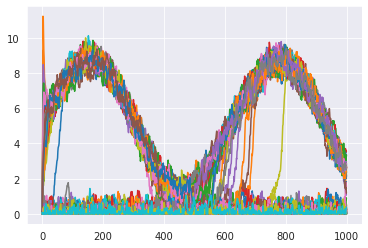

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  aux_K = (100 + 80*np.sin(tmp_time[1]/100))*np.ones(aux_N)
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
total_sol.shape

(1000, 100)

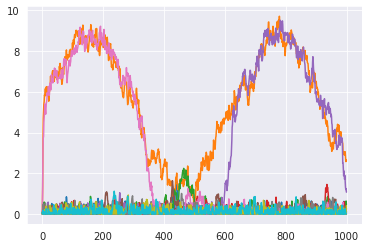

In [ ]:
indd = 10
for ind in range(indd):
  plt.plot(total_sol[:,ind])
#plt.plot((100 + 80*np.sin(time/100))/190)
plt.show()

# Allometry on Equilibrium
### fitting static patterns for varying different masses
### here C = f K, where f is fixed; and A is fixed as well

In [1]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [2]:
def scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f):
    b=eta1*(M**nu1)
    K=eta2*(M**nu2)
    A=eta3*(M**nu3)
    C=f*K
    m=eta4*(M**nu4)
    return b,K,A,C,m

In [4]:
M= np.linspace(1e-2,1e2,10000)

#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.5
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)

In [5]:
def pred_equilibria(A, K, b, C, m, n):
    aa = b*((n-1)*A + 1)
    bb = -(b-m)*K
    cc = m*C*K
    delta = bb*bb - 4*aa*cc
    E1=( -bb + np.sqrt(delta) )/(2*aa)
    E2=( -bb - np.sqrt(delta) )/(2*aa)
    return E1,E2

In [6]:
n=5
E1,E2=pred_equilibria(A, K, b, C, m, n)

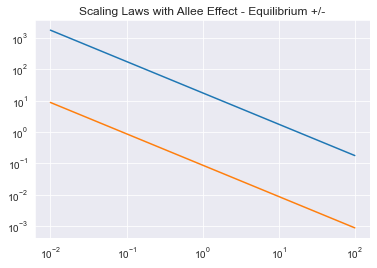

In [7]:
plt.loglog()
plt.plot(M,E1)
plt.plot(M,E2)
plt.title("Scaling Laws with Allee Effect - Equilibrium +/-")
plt.show()

In [8]:
logM = np.log(M)
logE1 = np.log(E1)
logE2 = np.log(E2)
print('Upper Limit')
params,cov1 = np.polyfit(logM, logE1, 1,cov=True) #m slope, c intecept (https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7)
print('slope: ',params[0])
print('intercept: ',params[1])
params,cov2 = np.polyfit(logM, logE2, 1,cov=True)
print('Lower Limit')
print('slope: ',params[0])
print('intercept: ',params[1])

Upper Limit
slope:  -0.9999999999999992
intercept:  2.875116179562897
Lower Limit
slope:  -1.0000000000000002
intercept:  -2.4356805518835833


In [9]:
print(np.sqrt(cov1[0][0]),np.sqrt(cov1[1][1]))
print(np.sqrt(cov2[0][0]),np.sqrt(cov2[1][1]))

1.0762007215907549e-17 4.0262285806826776e-17
6.411255130941722e-17 2.398546862902212e-16


# Allometry on Dynamic Equations, deterministic and stochastic

In [37]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
min_m = 0.5
max_m = 15
aux_N = 100
M = loguniform.rvs(min_m, max_m, size=aux_N)
#saving the masses, which will be the same always
np.savetxt("masses.csv", M, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 0$ 

In [82]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)


### Deterministic Model - 100 species, fixed 

In [83]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

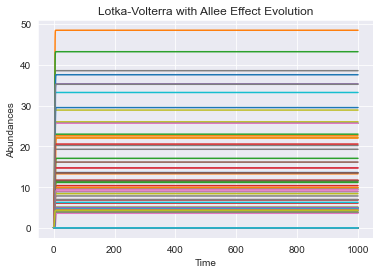

In [84]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [85]:
#saving the results
np.savetxt("first_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("first_deterministic_times.csv",sol.t,delimiter=',')

### Stochatic model - 100 species, fixed

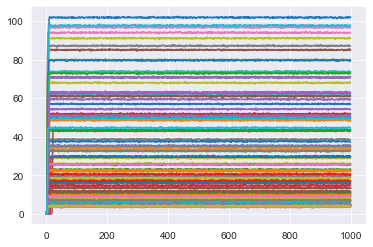

(1000, 100)


In [86]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [87]:
np.savetxt("first_stochastic.csv", total_sol, delimiter=",")
np.savetxt("first_stochastic_times.csv", time, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 0.5$ 

In [88]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.5
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

### Deterministic Model 

In [89]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

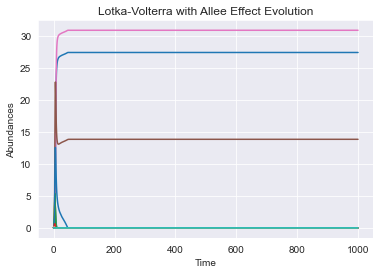

In [90]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [91]:
#saving the results
np.savetxt("second_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("second_deterministic_times.csv",sol.t,delimiter=',')

### Stochastic model 

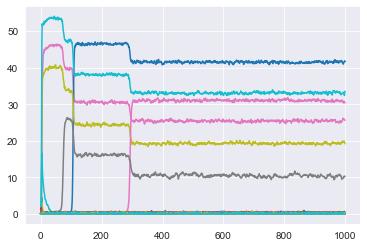

(1000, 100)


In [92]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [93]:
np.savetxt("second_stochastic.csv", total_sol, delimiter=",")
np.savetxt("second_stochastic_times.csv", time, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 1$

In [94]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=1
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

### Deterministic Model 

In [95]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

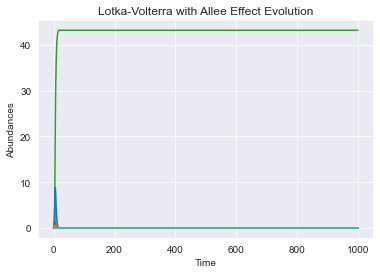

In [96]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [97]:
#saving the results
np.savetxt("third_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("third_deterministic_times.csv",sol.t,delimiter=',')

### Stochastic 

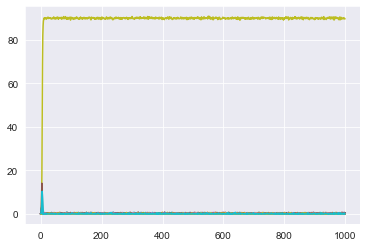

(1000, 100)


In [98]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [99]:
np.savetxt("third_stochastic.csv", total_sol, delimiter=",")
np.savetxt("third_stochastic_times.csv", time, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 1.5$

In [100]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=1.5
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

### Deterministic

In [101]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

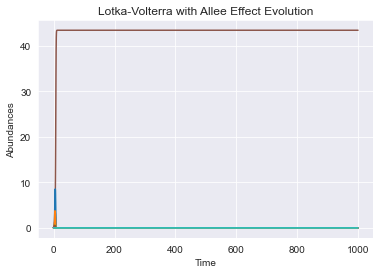

In [102]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [103]:
#saving the results
np.savetxt("fourth_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("fourth_deterministic_times.csv",sol.t,delimiter=',')

### Stochastic

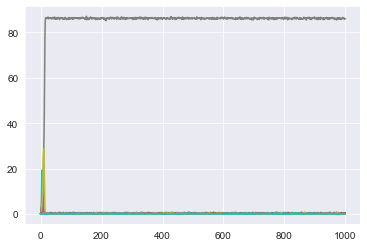

(1000, 100)


In [104]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [105]:
np.savetxt("fourth_stochastic.csv", total_sol, delimiter=",")
np.savetxt("fourth_stochastic_times.csv", time, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 0.1$

In [106]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.1 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

### Deterministic

In [107]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

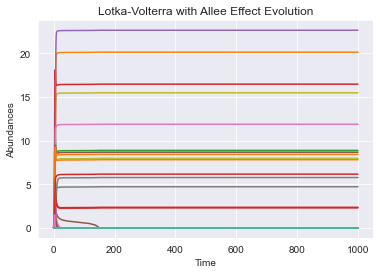

In [108]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [109]:
#saving the results
np.savetxt("fifth_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("fifth_deterministic_times.csv",sol.t,delimiter=',')

### Stochastic

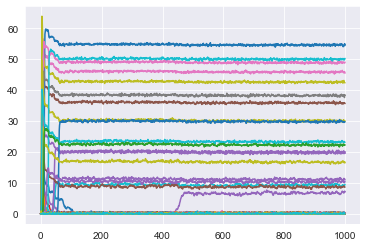

(1000, 100)


In [110]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [111]:
np.savetxt("fifth_stochastic.csv", total_sol, delimiter=",")
np.savetxt("fifth_stochastic_times.csv", time, delimiter=",")

## Determining masses, species and parameters for simulations, $\alpha = 0.05$

In [115]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.05 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

### Deterministic

In [116]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e3), method="Radau", y0=rng.uniform(0,0.1,size=aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

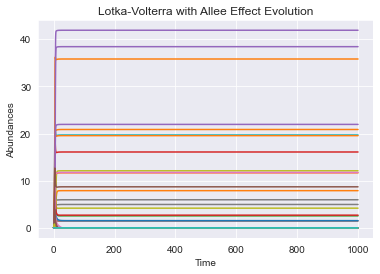

In [117]:
fig, ax = plt.subplots()


ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

plt.show()

In [118]:
#saving the results
np.savetxt("sixth_deterministic.csv", sol.y.T, delimiter=",")
np.savetxt("sixth_deterministic_times.csv",sol.t,delimiter=',')

### Stochastic

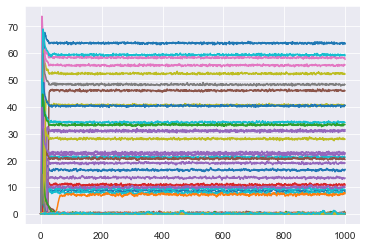

(1000, 100)


In [122]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()
print(total_sol.shape)

In [123]:
np.savetxt("sixth_stochastic.csv", total_sol, delimiter=",")
np.savetxt("sixth_stochastic_times.csv", time, delimiter=",")

# Allometry on Dynamic Equations, perturbative
This means we're adding a periodic perturbations in K

In [136]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

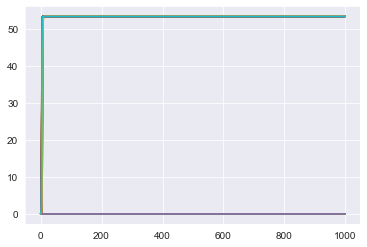

In [130]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 0
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  aux_K = (100 + 0*np.sin(tmp_time[1]/100))*np.ones(aux_N)
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()